<a href="https://colab.research.google.com/github/abigailvania99/machineLearning/blob/main/GMM_Abigail_Vania_2402345072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###GMM & K-Means

####Melakukan Import library

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import silhouette_score

####K-Means

##### Menentukan jumlah cluster dengan menggunakan metode silhouette

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

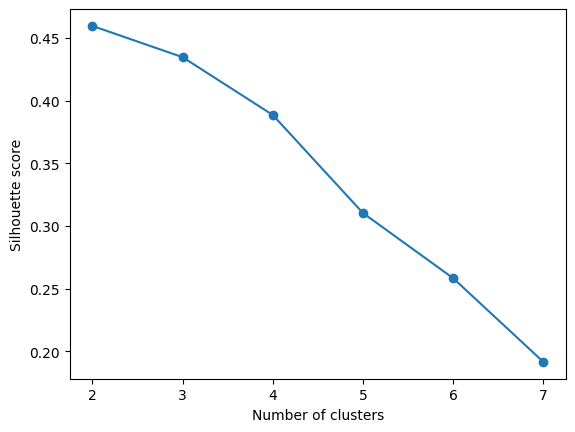

In [ ]:
data = np.array([[3.,4.],[3.,6.],[3.,8.],[4.,5.],[4.,7.],[5.,1.],[5.,5.],[7.,3.],[7.,4.],[8.,5.]])
silhouette_scores = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

# Plot the silhouette scores
plt.plot(range(2,8), silhouette_scores, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

Berdasarkan hasil dari silhouette, terlihat k yang paling efektif adalah 2 (nilai silhouette yang terbesar)

#####Menghitung Covariance serta melakukan plot gambar cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[5. 1.]
 [7. 3.]
 [7. 4.]
 [8. 5.]]
[[3. 4.]
 [3. 6.]
 [3. 8.]
 [4. 5.]
 [4. 7.]
 [5. 5.]]
K-Means Center:  [[6.75       3.25      ]
 [3.66666667 5.83333333]]
Covarians Matrix 
 [array([[1.58333333, 2.08333333],
       [2.08333333, 2.91666667]]), array([[ 0.66666667, -0.26666667],
       [-0.26666667,  2.16666667]])]


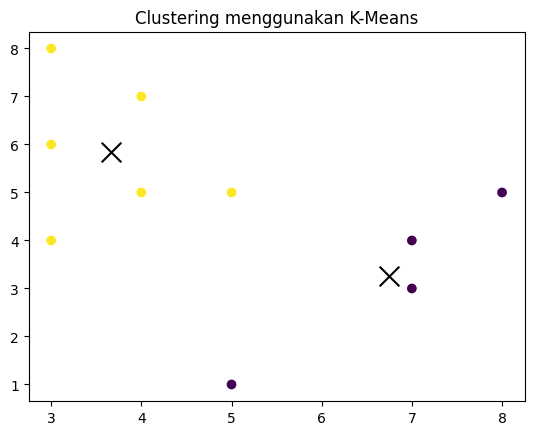

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
# Covariance matrix
covariance_matrices = []
for i in range(2):
  data_cluster = data[labels == i]
  print(data_cluster)
  covariance_matrix = np.cov(data_cluster.T)
  covariance_matrices.append(covariance_matrix)
print("K-Means Center: ", kmeans.cluster_centers_)
print("Covarians Matrix \n", covariance_matrices)


plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c="black", s=200, marker="x")
plt.title('Clustering menggunakan K-Means')

plt.show()

Hasil covarians matrix dari K-Means adalah <br>
[[[ 0.66666667, -0.26666667], [-0.26666667,  2.16666667]],
[[1.58333333, 2.08333333], [2.08333333, 2.91666667]]]

####GMM
*   Menggunakan miu yang mendekati hasil K-Means adalah (4,5) dan (7,3)
*   Menggunakan sigma yang mendekati hasil K-Means [[[ 0.6, -0.2], [-0.2,  2.166]], [[1.583, 2], [2, 2.8]]]
*   Menggunakan 2 cluster berdasarkan hasil K-means
*   phi berdasarkan k-means 6/10 dan 4/10, tetapi yang digunakan 5/10 dan 5/10










##### Melakukan inisialisasi variabel

In [ ]:
data = np.array([])
mu = np.array([[]])
sigma = np.array([[[]]])
phi = np.array([])
likelihood = None
resp = None
log_likelihood = None

def initial():
  global data, mu, sigma, phi, likelihood, resp

  data = np.array([[3.,4.],[3.,6.],[3.,8.],[4.,5.],[4.,7.],[5.,1.],[5.,5.],[7.,3.],[7.,4.],[8.,5.]])
  mu = np.array([[4.,5.], [7.,3.]])
  sigma = np.array([[[ 0.6, -0.2],
       [-0.2,  2.166]],[[1.583, 2.],
       [2., 2.8]]])
  phi = np.array([5/10, 5/10])
  likelihood = np.zeros((10,2))
  resp = np.zeros((10,2))


##### E-step & Log likelihood<br>
melakukan evaluasi responsibilities berdasarkan nilai parameter

In [ ]:
def e_step():
  global likelihood, resp, log_likelihood

  for i in range(2):
    likelihood[:,i] = multivariate_normal.pdf(data, mu[i],sigma[i], allow_singular = True)
    resp[:,i] = phi[i] * likelihood[:,i]

  log_likelihood = np.sum(np.log(np.sum(resp, axis = 1)))
  resp /= resp.sum(axis=1, keepdims=1)

  print('Log Likelihood :\n', log_likelihood)
  print('Responsibility :\n', resp)

##### M-step <br>
Melakukan update nilai miu, sigma, phi

In [ ]:
def m_step():
  global mu,sigma,phi
  for i in range(2):
    weight = resp[:, [i]]
    total_weight = weight.sum()
    mu[i] = (data * weight).sum(axis=0) / total_weight
    sigma[i] = np.cov(data.T, aweights=(weight/total_weight).flatten(),bias = True)

  phi = resp.mean(axis=0)

  print("Updated Phi: ",phi)
  print("Updated Means : ", mu)
  print("Updated Covariances :", sigma)
  print('\n\n\n')

##### Plot <br>

In [ ]:
def plot_gmm():
  print("Phi: ",phi)
  print("Means : ", mu)
  print("Covariances :", sigma)
  print('\n')
  # Plot data
  plt.scatter(data[:, 0], data[:, 1], c=resp.argmax(axis=1))
  plt.scatter(mu[:, 0], mu[:, 1], c="black", s=200, marker="x")

  # Set the title
  plt.title('Clustering menggunakan GMM')

  # Show the plot
  plt.show()

##### Run GMM <br>

In [ ]:
def run():
  initial()
  for i in range(4):
    print(f'After {i} iterations')
    e_step()
    plot_gmm()
    m_step()



After 0 iterations
Log Likelihood :
 -35.71079124920015
Responsibility :
 [[1.00000000e+00 2.81716575e-31]
 [1.00000000e+00 7.62173351e-54]
 [1.00000000e+00 6.05400665e-82]
 [1.00000000e+00 2.21065926e-28]
 [1.00000000e+00 1.46580896e-49]
 [5.74053191e-02 9.42594681e-01]
 [1.00000000e+00 5.83608078e-17]
 [2.55311703e-04 9.99744688e-01]
 [2.01701372e-03 9.97982986e-01]
 [2.30051740e-06 9.99997699e-01]]
Phi:  [0.5 0.5]
Means :  [[4. 5.]
 [7. 3.]]
Covariances : [[[ 0.6   -0.2  ]
  [-0.2    2.166]]

 [[ 1.583  2.   ]
  [ 2.     2.8  ]]]




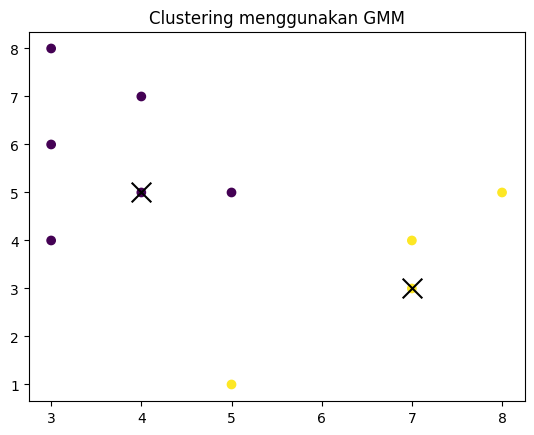

Updated Phi:  [0.60596799 0.39403201]
Updated Means :  [[3.68054938 5.78681566]
 [6.77535031 3.28241082]]
Updated Covariances : [[[ 0.57090649 -0.28287158]
  [-0.28287158  2.00837397]]

 [[ 1.16018961  1.5278865 ]
  [ 1.5278865   2.14553354]]]




After 1 iterations
Log Likelihood :
 -31.27457814868017
Responsibility :
 [[1.00000000e+000 3.80346633e-055]
 [1.00000000e+000 3.21287592e-099]
 [1.00000000e+000 2.20173327e-155]
 [1.00000000e+000 7.88003241e-049]
 [1.00000000e+000 3.81810808e-090]
 [5.16198750e-003 9.94838013e-001]
 [1.00000000e+000 3.43686146e-027]
 [9.52315050e-005 9.99904768e-001]
 [7.46983000e-005 9.99925302e-001]
 [5.71408192e-008 9.99999943e-001]]
Phi:  [0.60596799 0.39403201]
Means :  [[3.68054938 5.78681566]
 [6.77535031 3.28241082]]
Covariances : [[[ 0.57090649 -0.28287158]
  [-0.28287158  2.00837397]]

 [[ 1.16018961  1.5278865 ]
  [ 1.5278865   2.14553354]]]




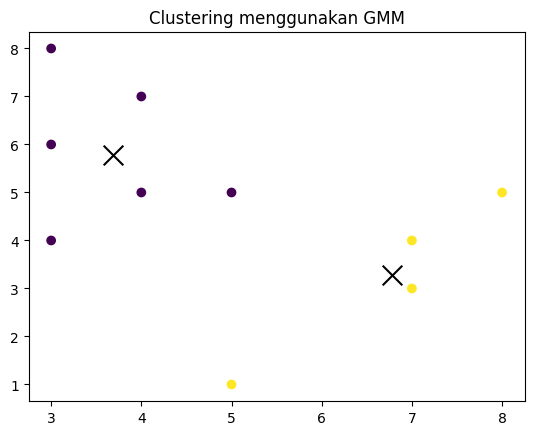

Updated Phi:  [0.6005332 0.3994668]
Updated Means :  [[3.66790712 5.82911101]
 [6.75225073 3.2528994 ]]
Updated Covariances : [[[ 0.55690346 -0.22778493]
  [-0.22778493  1.82418419]]

 [[ 1.18511987  1.5594889 ]
  [ 1.5594889   2.1838575 ]]]




After 2 iterations
Log Likelihood :
 -31.251958911262992
Responsibility :
 [[1.00000000e+000 1.26295298e-055]
 [1.00000000e+000 2.98443191e-100]
 [1.00000000e+000 4.62861920e-157]
 [1.00000000e+000 2.65140357e-049]
 [1.00000000e+000 3.86109094e-091]
 [2.25702291e-003 9.97742977e-001]
 [1.00000000e+000 1.91871010e-027]
 [5.57822892e-005 9.99944218e-001]
 [5.35518119e-005 9.99946448e-001]
 [4.53037149e-008 9.99999955e-001]]
Phi:  [0.6005332 0.3994668]
Means :  [[3.66790712 5.82911101]
 [6.75225073 3.2528994 ]]
Covariances : [[[ 0.55690346 -0.22778493]
  [-0.22778493  1.82418419]]

 [[ 1.18511987  1.5594889 ]
  [ 1.5594889   2.1838575 ]]]




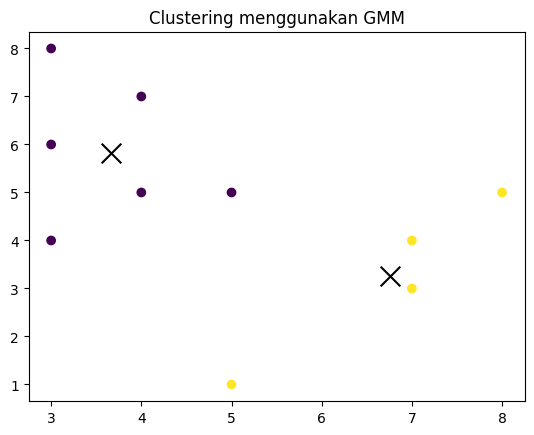

Updated Phi:  [0.60023664 0.39976336]
Updated Means :  [[3.66722878 5.8314732 ]
 [6.75098118 3.25126375]]
Updated Covariances : [[[ 0.55620723 -0.22469914]
  [-0.22469914  1.81372916]]

 [[ 1.1864712   1.56119895]
  [ 1.56119895  2.18592662]]]




After 3 iterations
Log Likelihood :
 -31.251880032279132
Responsibility :
 [[1.00000000e+000 1.18767357e-055]
 [1.00000000e+000 2.61372727e-100]
 [1.00000000e+000 3.73657250e-157]
 [1.00000000e+000 2.49501011e-049]
 [1.00000000e+000 3.39807057e-091]
 [2.14339135e-003 9.97856609e-001]
 [1.00000000e+000 1.85729455e-027]
 [5.40012611e-005 9.99945999e-001]
 [5.25197738e-005 9.99947480e-001]
 [4.47602159e-008 9.99999955e-001]]
Phi:  [0.60023664 0.39976336]
Means :  [[3.66722878 5.8314732 ]
 [6.75098118 3.25126375]]
Covariances : [[[ 0.55620723 -0.22469914]
  [-0.22469914  1.81372916]]

 [[ 1.1864712   1.56119895]
  [ 1.56119895  2.18592662]]]




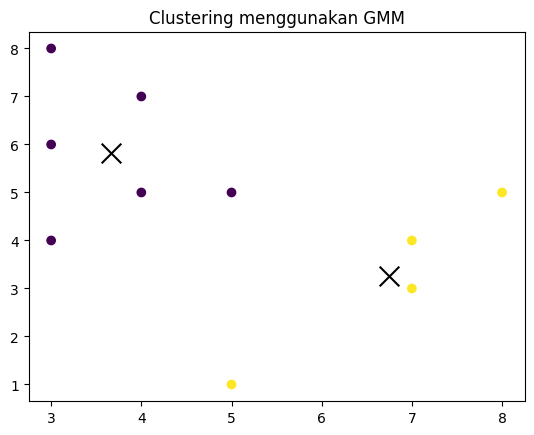

Updated Phi:  [0.600225 0.399775]
Updated Means :  [[3.66720199 5.83156582]
 [6.75093159 3.25119984]]
Updated Covariances : [[[ 0.55617919 -0.22457774]
  [-0.22457774  1.81331946]]

 [[ 1.18652382  1.56126553]
  [ 1.56126553  2.18600717]]]






In [ ]:
run()

After 0 iterations
Log Likelihood :
 -35.71079124920015
Responsibility :
 [[1.00000000e+00 2.81716575e-31]
 [1.00000000e+00 7.62173351e-54]
 [1.00000000e+00 6.05400665e-82]
 [1.00000000e+00 2.21065926e-28]
 [1.00000000e+00 1.46580896e-49]
 [5.74053191e-02 9.42594681e-01]
 [1.00000000e+00 5.83608078e-17]
 [2.55311703e-04 9.99744688e-01]
 [2.01701372e-03 9.97982986e-01]
 [2.30051740e-06 9.99997699e-01]]
Phi:  [0.5 0.5]
Means :  [[4. 5.]
 [7. 3.]]
Covariances : [[[ 0.6   -0.2  ]
  [-0.2    2.166]]

 [[ 1.583  2.   ]
  [ 2.     2.8  ]]]




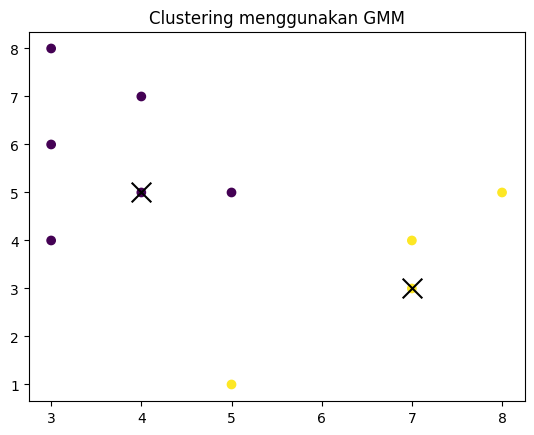

Updated Phi:  [0.60596799 0.39403201]
Updated Means :  [[3.68054938 5.78681566]
 [6.77535031 3.28241082]]
Updated Covariances : [[[ 0.57090649 -0.28287158]
  [-0.28287158  2.00837397]]

 [[ 1.16018961  1.5278865 ]
  [ 1.5278865   2.14553354]]]




After 1 iterations
Log Likelihood :
 -31.27457814868017
Responsibility :
 [[1.00000000e+000 3.80346633e-055]
 [1.00000000e+000 3.21287592e-099]
 [1.00000000e+000 2.20173327e-155]
 [1.00000000e+000 7.88003241e-049]
 [1.00000000e+000 3.81810808e-090]
 [5.16198750e-003 9.94838013e-001]
 [1.00000000e+000 3.43686146e-027]
 [9.52315050e-005 9.99904768e-001]
 [7.46983000e-005 9.99925302e-001]
 [5.71408192e-008 9.99999943e-001]]
Phi:  [0.60596799 0.39403201]
Means :  [[3.68054938 5.78681566]
 [6.77535031 3.28241082]]
Covariances : [[[ 0.57090649 -0.28287158]
  [-0.28287158  2.00837397]]

 [[ 1.16018961  1.5278865 ]
  [ 1.5278865   2.14553354]]]




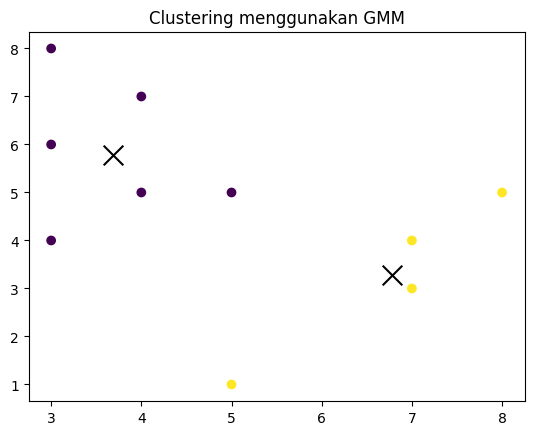

Updated Phi:  [0.6005332 0.3994668]
Updated Means :  [[3.66790712 5.82911101]
 [6.75225073 3.2528994 ]]
Updated Covariances : [[[ 0.55690346 -0.22778493]
  [-0.22778493  1.82418419]]

 [[ 1.18511987  1.5594889 ]
  [ 1.5594889   2.1838575 ]]]




After 2 iterations
Log Likelihood :
 -31.251958911262992
Responsibility :
 [[1.00000000e+000 1.26295298e-055]
 [1.00000000e+000 2.98443191e-100]
 [1.00000000e+000 4.62861920e-157]
 [1.00000000e+000 2.65140357e-049]
 [1.00000000e+000 3.86109094e-091]
 [2.25702291e-003 9.97742977e-001]
 [1.00000000e+000 1.91871010e-027]
 [5.57822892e-005 9.99944218e-001]
 [5.35518119e-005 9.99946448e-001]
 [4.53037149e-008 9.99999955e-001]]
Phi:  [0.6005332 0.3994668]
Means :  [[3.66790712 5.82911101]
 [6.75225073 3.2528994 ]]
Covariances : [[[ 0.55690346 -0.22778493]
  [-0.22778493  1.82418419]]

 [[ 1.18511987  1.5594889 ]
  [ 1.5594889   2.1838575 ]]]




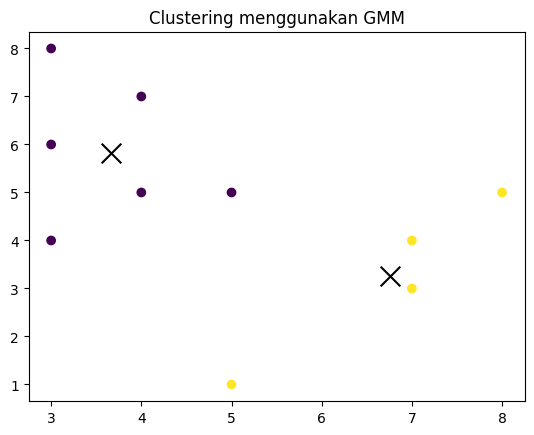

Updated Phi:  [0.60023664 0.39976336]
Updated Means :  [[3.66722878 5.8314732 ]
 [6.75098118 3.25126375]]
Updated Covariances : [[[ 0.55620723 -0.22469914]
  [-0.22469914  1.81372916]]

 [[ 1.1864712   1.56119895]
  [ 1.56119895  2.18592662]]]




After 3 iterations
Log Likelihood :
 -31.251880032279132
Responsibility :
 [[1.00000000e+000 1.18767357e-055]
 [1.00000000e+000 2.61372727e-100]
 [1.00000000e+000 3.73657250e-157]
 [1.00000000e+000 2.49501011e-049]
 [1.00000000e+000 3.39807057e-091]
 [2.14339135e-003 9.97856609e-001]
 [1.00000000e+000 1.85729455e-027]
 [5.40012611e-005 9.99945999e-001]
 [5.25197738e-005 9.99947480e-001]
 [4.47602159e-008 9.99999955e-001]]
Phi:  [0.60023664 0.39976336]
Means :  [[3.66722878 5.8314732 ]
 [6.75098118 3.25126375]]
Covariances : [[[ 0.55620723 -0.22469914]
  [-0.22469914  1.81372916]]

 [[ 1.1864712   1.56119895]
  [ 1.56119895  2.18592662]]]




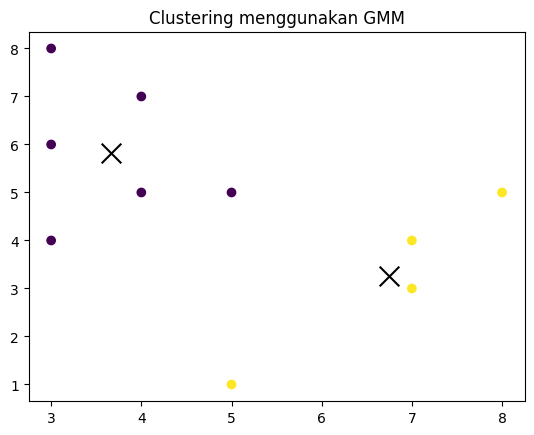

Updated Phi:  [0.600225 0.399775]
Updated Means :  [[3.66720199 5.83156582]
 [6.75093159 3.25119984]]
Updated Covariances : [[[ 0.55617919 -0.22457774]
  [-0.22457774  1.81331946]]

 [[ 1.18652382  1.56126553]
  [ 1.56126553  2.18600717]]]






In [ ]:
run()